<a href="https://colab.research.google.com/github/eldorjonneymatov/mdev_ds_pract/blob/main/final/final2_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pnevmaniyani aniqlash

## Faoliyatni o\`rganish

**Loyiha maqsadi**: Ko\`krak qafasi rentgenogrammalariga asosan o\`pkaning shaffof yoki pnevmaniya ekanligini aniqlovchi model yaratish. Buning uchun deep learning vision learner algoritmlaridan foydalaniladi.

## Kerakli modullarni yuklab olish va vizualizatsiya uchun ba\`zi parametrlarni o`rnatish

In [1]:
!pip install opendatasets
!pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 202 kB/s 
     |████████████████████████████████| 57 kB 6.0 MB/s 
     |████████████████████████████████| 1.6 MB 28.6 MB/s 


In [2]:
import os
import nbdev
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
%matplotlib inline
from os import listdir
from fastai.vision.all import *
from google.colab import output

In [3]:
output.enable_custom_widget_manager()

## Ma\`lumotlar bilan tanishish

In [4]:
od.download('https://www.kaggle.com/competitions/pnevmoniya/data')

100%|██████████| 1.14G/1.14G [00:08<00:00, 146MB/s]



Extracting archive ./pnevmoniya/pnevmoniya.zip to ./pnevmoniya


In [5]:
path = Path('pnevmoniya')
path.ls()

(#3) [Path('pnevmoniya/sample_solution.csv'),Path('pnevmoniya/train'),Path('pnevmoniya/test')]

In [6]:
path = path/'train'
fns = get_image_files(path)
failed = verify_images(fns)
failed

(#0) []

## Ma\`lumotlarni modellash uchun tayyorlash

In [7]:
norm_count = len((path/'NORMAL').ls())
pneu_count = len((path/'PNEUMONIA').ls())
labels = [0] * norm_count + [1] * pneu_count
db = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter= TrainTestSplitter (train_size=0.2, random_state=None, 
                                 stratify=labels, shuffle=True),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(128, min_scale=0.5),
    batch_tfms = aug_transforms()
)
dls = db.dataloaders(path, bs=64)

## Modellash

In [8]:
learn = vision_learner(dls, resnet34, metrics=[accuracy])
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.880669,0.624867,0.834291,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.544236,0.299607,0.908046,00:33
1,0.457792,0.315052,0.933908,00:30


epoch,train_loss,valid_loss,accuracy,time
0,0.544236,0.299607,0.908046,00:33
1,0.457792,0.315052,0.933908,00:30
2,0.391510,0.247817,0.944444,00:30
3,0.341432,0.219220,0.943487,00:31


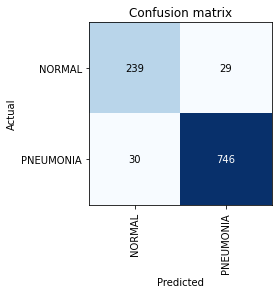

In [9]:
intrep = ClassificationInterpretation.from_learner(learn)
intrep.plot_confusion_matrix()

## Sinov ma\`lumotlari uchun xulosa qilish

In [ ]:
path2 = Path('pnevmoniya/test')
dl = learn.dls.test_dl(path2.ls())

In [11]:
preds, _, decoded = learn.get_preds(dl=dl, with_decoded=True)

In [12]:
decoded

TensorBase([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
            0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
            0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
            1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
            0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
            1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
            0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
            1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
            1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
            0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1

## Olingan xulosalarni taqdimot uchun tayyorlash

In [13]:
test_names = listdir(path2)

In [14]:
solution = pd.DataFrame({'id':test_names, 'labels':decoded})

In [15]:
solution

,id,labels
0,test_img_10050.jpeg,1
1,test_img_10492.jpeg,0
2,test_img_10495.jpeg,1
3,test_img_10518.jpeg,1
4,test_img_10406.jpeg,0
...,...,...
619,test_img_10561.jpeg,1
620,test_img_10121.jpeg,1
621,test_img_10315.jpeg,0
622,test_img_10553.jpeg,1


In [16]:
solution.to_csv('solution.csv',index=False)